In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
line_color = "white"  # #00274C
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#b9dbf4"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

In [3]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/condensate_sideview"
os.chdir(folder_save)

### Side view plot

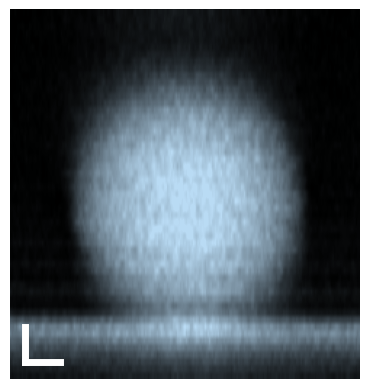

In [21]:
img = imread("20230911-Cy5_zStack1-deconvolved.tif")
um_per_pixel_xy = 0.0416
um_per_pixel_z = 0.2

img_toplot = img[3:-12, :, :-15].sum(axis=1)
vmin, vmax = np.percentile(img_toplot, (0.5, 99))

aspect = um_per_pixel_z / um_per_pixel_xy

plt.figure()
plt.imshow(
    img_toplot,
    aspect=aspect,
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
)

# plot scale bar
scalebar_length_um = 1
scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_xy
scalebar_length_pxl_z = scalebar_length_um / um_per_pixel_z
plt.plot(
    [10, 10 + scalebar_length_pxl_x],
    [2, 2],
    "-",
    color="white",
    lw=5,
)
plt.plot(
    [10, 10],
    [2, 2 + scalebar_length_pxl_z],
    "-",
    color="white",
    lw=5,
)

plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("Fig1_condensate_sideview_scalebar1um.png", dpi=300, format="png", bbox_inches="tight")
plt.show()